# **Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости**

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-параметров" data-toc-modified-id="Исследование-параметров-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Исследование параметров</a></span></li><li><span><a href="#Исследование-времени-продажи-квартир" data-toc-modified-id="Исследование-времени-продажи-квартир-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Исследование времени продажи квартир</a></span></li><li><span><a href="#Анализ-редких-и-выбивающихся-значений" data-toc-modified-id="Анализ-редких-и-выбивающихся-значений-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Анализ редких и выбивающихся значений</a></span></li><li><span><a href="#Исследование-факторов,-влияющих-на-стоимость-квартиры" data-toc-modified-id="Исследование-факторов,-влияющих-на-стоимость-квартиры-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Исследование факторов, влияющих на стоимость квартиры</a></span></li><li><span><a href="#Исследование-10-населённых-пунктов-с-наибольшим-числом-объявлений" data-toc-modified-id="Исследование-10-населённых-пунктов-с-наибольшим-числом-объявлений-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Исследование 10 населённых пунктов с наибольшим числом объявлений</a></span></li><li><span><a href="#Анализ-изменения-цены-по-степени-удаленности-от-центра" data-toc-modified-id="Анализ-изменения-цены-по-степени-удаленности-от-центра-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Анализ изменения цены по степени удаленности от центра</a></span></li><li><span><a href="#Сравнение-выводов-по-квартирам-в-центре-с-общими-выводами-по-городу" data-toc-modified-id="Сравнение-выводов-по-квартирам-в-центре-с-общими-выводами-по-городу-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Сравнение выводов по квартирам в центре с общими выводами по городу</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

**Задача исследования**

Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир.

В ходе исследования предстоит:
- изучить параметры объектов недвижимости
- определить факторы, влияющие на стоимость жилья
- выполнить необхоимые расчеты


## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.2f}'.format)


Прочитаем файл real_estate_data.csv и сохраним его в переменной df:

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Изучим общую информацию о таблице, найдем дубликаты и пропуски:

In [3]:
def info (df):               # функция для получения первичной информации о датасете
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.float_format', '{:,.2f}'.format)
    display(df.head(5))
    print(f'В таблице строк: {df.shape[0]}, столбцов: {df.shape[1]} ')
    print('Количество дубликатов:', df.duplicated().sum())
    print('Процент дубликатов: ', "{:.2%}".format((df.duplicated().sum()/df.shape[0])))
    tbl = pd.concat([df.dtypes, df.isna().sum(), round((df.isna().mean()*100),2), ], axis=1, 
                   keys=["Тип данных", "Кол-во пропусков", "% пропусков", ])
    display(tbl)

info(df)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


В таблице строк: 23699, столбцов: 22 
Количество дубликатов: 0
Процент дубликатов:  0.00%


,Тип данных,Кол-во пропусков,% пропусков
total_images,int64,0,0.00
last_price,float64,0,0.00
total_area,float64,0,0.00
first_day_exposition,object,0,0.00
rooms,int64,0,0.00
ceiling_height,float64,9195,38.80
floors_total,float64,86,0.36
living_area,float64,1903,8.03
floor,int64,0,0.00
is_apartment,object,20924,88.29


**Описание данных:**
    
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении



**Вывод**

Для проведения исследования, исходя из требований, понадобятся данные не всех колонок, однако избавляться от них мы на данном этапе не будем. 

Видим, что в данных есть пропуски. Типы данных в некоторых колонках отличаются от документации. Явных дубликатов в таблице на данном этапе нет. Необходима предобработка данных.



## Предобработка данных

Среди столбцов выделяется `cityCenters_nearest`, для единообразия изменим название этого столбца на змеиный регистр.

In [4]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**Обработка пропущенных значений**

In [5]:
tbl = pd.concat([df.dtypes, df.isna().sum(), round((df.isna().mean()*100),2), ], axis=1, 
                   keys=["Тип данных", "Кол-во пропусков", "% пропусков", ])
display(tbl)

,Тип данных,Кол-во пропусков,% пропусков
total_images,int64,0,0.00
last_price,float64,0,0.00
total_area,float64,0,0.00
first_day_exposition,object,0,0.00
rooms,int64,0,0.00
ceiling_height,float64,9195,38.80
floors_total,float64,86,0.36
living_area,float64,1903,8.03
floor,int64,0,0.00
is_apartment,object,20924,88.29


Учитывая условия исследования и невозможность получить уточняющую информацию по объектам недвижимости, не все пропуски могут быть заполнены. 

Оставим без изменений данные о количестве парков и прудов и о расстоянии до них. Если эти данные заполнялись автоматически, можно предположить, что пропуски означают, что эту информацию получить не удалось. Расстояние не удалось определить в более чем половине наблюдений. Для анализа эту информацию мы использовать не будем, но следует обратить внимание коллег на проблему.

Оставим пропуски в колонках `city_centers_nearest` и `airports_nearest`, т.к. у нас нет адресов объектов.

Рассмотрим колонку `ceiling_height`:

In [6]:
print(df['ceiling_height'].describe())

count   14,504.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64


Высота потолков не указана у значимой части датафрейма, медианное и среднее значение практически равны. Заменим пропуски в этой колонке на медианное значение.

In [7]:
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()

print('Пропусков:', df['ceiling_height'].isna().sum())

Пропусков: 0


Количество балконов не указано почти в половине наблюдений. Если их указывали люди, можно предположить, что пропуски означают отсутствие балкона. Заменим пропуски здесь на 0.

In [8]:
df['balcony'] = df['balcony'].fillna(0)
print('Пропусков:', df['balcony'].isna().sum())

Пропусков: 0


Колонка `is_apartment` по большей части не заполнена, поскольку в расчетах она не участвует, можно оставить значения как есть, либо заменить на `False`. Если данные заполнялись пользоваелем, то вероятно пустым это поле оставляли владельцы обычных квартир.

In [9]:
df['is_apartment'] = df['is_apartment'].fillna(False)
print('Пропусков:', df['is_apartment'].isna().sum())

Пропусков: 0


В колонках `locality_name` и `floors_total` пропущено менее 1% данных. Можно удалить строки с пропусками, таким образом мы избежим возможных некорректных замен.

In [10]:
df = df.dropna(subset=['locality_name', 'floors_total']).reset_index(drop=True)
print('Пропусков:', df[['locality_name', 'floors_total']].isna().sum())

Пропусков: locality_name    0
floors_total     0
dtype: int64


Заполним пропуски в колонке `kitchen_area` по среднему значению размера кухни в соответствии с количеством комнат.

In [11]:
df.groupby('rooms')['kitchen_area'].mean()

rooms
0       NaN
1      9.54
2      9.97
3     11.29
4     13.67
5     18.37
6     21.10
7     22.00
8     24.87
9     25.07
10    22.87
11    12.60
12   112.00
14    21.25
15   100.00
16    13.00
19    27.60
Name: kitchen_area, dtype: float64

In [12]:
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('rooms')['kitchen_area'].transform('mean'))
df.groupby('rooms')['kitchen_area'].mean()  

rooms
0       NaN
1      9.54
2      9.97
3     11.29
4     13.67
5     18.37
6     21.10
7     22.00
8     24.87
9     25.07
10    22.87
11    12.60
12   112.00
14    21.25
15   100.00
16    13.00
19    27.60
Name: kitchen_area, dtype: float64

In [13]:
df['kitchen_area'] = df['kitchen_area'].fillna(0)  # в квартирах с 0 комнатами нет данных о кухне, заменим эти пропуски также нулем.
print('Пропусков:', df['kitchen_area'].isna().sum())

Пропусков: 0


Теперь заполним пропуски в размерах жилой площади по такому же принципу. Сгруппируем по количеству комнат и заменим пропуски средним значением групп.

In [14]:
print(df.groupby('rooms')['living_area'].mean())
df['living_area'] = df['living_area'].fillna(df.groupby('rooms')['living_area'].transform('mean'))
print('Пропусков:', df['kitchen_area'].isna().sum())

rooms
0     18.87
1     17.90
2     31.73
3     47.37
4     66.99
5    100.01
6    131.80
7    163.56
8    168.68
9    190.26
10   165.57
11   133.90
12   409.70
14   195.15
15   409.00
16   180.00
19   264.50
Name: living_area, dtype: float64
Пропусков: 0


Рассмотрим колонку `days_exposition`. 

count   20,394.00
mean       180.74
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64


45.00    879
60.00    538
7.00     234
30.00    208
90.00    200
4.00     174
3.00     157
5.00     152
14.00    147
9.00     142
Name: days_exposition, dtype: int64

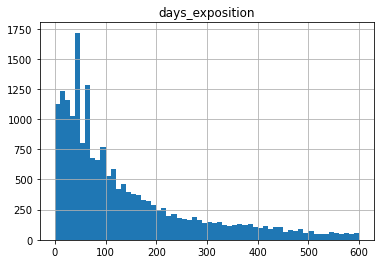

In [15]:
df[['days_exposition']].hist(bins=60, range=(0, 600))
print(df['days_exposition'].describe())
df['days_exposition'].value_counts().head(10)

Поскольку у нас нет сведений, которые помогли бы помочь определить срок размещения, лучше оставить данные без изменений. Замена на медианное значение для 3000 неблюдений резко увеличит количество продаж за 95 дней, появится пик, которого сейчас на гистограмме нет. 

Итоговые результаты обработки пропусков:

In [16]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

**Обработка типов данных**

Изменим тип данных с float на int  в некоторых колонках. Так будет удобнее визуально и по логике, количество этажей, балконов не может быть дробным числом.

In [17]:
df[['last_price', 'balcony', 'floors_total']] = df[['last_price', 'balcony', 'floors_total']].astype('int')
df[['last_price', 'balcony', 'floors_total']].head()

,last_price,balcony,floors_total
0,13000000,0,16
1,3350000,2,11
2,5196000,0,5
3,64900000,0,14
4,10000000,0,14


Изменим тип данных в колонке `first_day_exposition` на `datetime`, чтобы в дальнейшем осуществлять операции с датами и округлим значения до дня. Лишняя информация о точном времени публикации сейчас не нужна.

In [18]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition'] = df['first_day_exposition'].dt.round('1d')
df[['first_day_exposition']].head()

,first_day_exposition
0,2019-03-07
1,2018-12-04
2,2015-08-20
3,2015-07-24
4,2018-06-19


**Вывод**

Мы заполнили пропуски в значимых колонках, сохранив практически все строки. Изменили тип данных в колонках для удобства дальнейшей работы. Данные готовы к дальнейшему анализу. 

## Расчёты и добавление результатов в таблицу

Рассчитаем цену квадратного метра. Для этого разделим стоимость `last_price` на общую площадь `total_area` и сохраним результат в отдельной колонке. 

In [19]:
def square_meter(row):
    result = row['last_price'] / row['total_area']
    return result

df['m2_price'] = df.apply(square_meter, axis=1)
df[['last_price', 'total_area', 'm2_price']].head()

,last_price,total_area,m2_price
0,13000000,108.00,"120,370.37"
1,3350000,40.40,"82,920.79"
2,5196000,56.00,"92,785.71"
3,64900000,159.00,"408,176.10"
4,10000000,100.00,"100,000.00"


Определим день недели, месяц и год публикации объявлений. Создадим колонки с результатами.

In [20]:
df['exposition_week_day'] = df['first_day_exposition'].dt.weekday
df['exposition_month'] = df['first_day_exposition'].dt.month
df['exposition_year'] = df['first_day_exposition'].dt.year
df[['first_day_exposition', 'exposition_week_day', 'exposition_month', 'exposition_year']].head()

,first_day_exposition,exposition_week_day,exposition_month,exposition_year
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018


Определим на каком этаже в доме находятся квартиры. Присвоим каждой квартире одну из трех категорий: квартиры на первом этаже, на последнем и все остальные. Напишем функцию 

In [21]:
def floor_level(row):
    floor = row['floor']
    floor_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floor_total:
        return 'последний'
    return 'другой'

df['floor_level'] = df.apply(floor_level, axis=1)
df[['floor', 'floor_level']].head()

,floor,floor_level
0,8,другой
1,1,первый
2,4,другой
3,9,другой
4,13,другой


Посчитаем и добавим в таблицу: соотношение жилой и общей площади и отношение площади кухни к общей площади.

In [22]:
df['kitchen_ratio'] = df['kitchen_area'] / df['total_area']
df['living_ratio'] = df['living_area'] / df['total_area']
df[['total_area', 'kitchen_area', 'living_area', 'kitchen_ratio', 'living_ratio']].head()

,total_area,kitchen_area,living_area,kitchen_ratio,living_ratio
0,108.00,25.00,51.00,0.23,0.47
1,40.40,11.00,18.60,0.27,0.46
2,56.00,8.30,34.30,0.15,0.61
3,159.00,11.29,47.37,0.07,0.30
4,100.00,41.00,32.00,0.41,0.32


**Вывод** 

В таблицу были добавлены доплнительные колонки с рассчетами. В дальнейшем анализе можно использовать их для сравнения параметров, построения графиков и выявления зависимостей.


## Исследовательский анализ данных

### Исследование параметров

**Изучим данные о площади квартир.**

In [23]:
df['total_area'].describe()

count   23,565.00
mean        60.32
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64

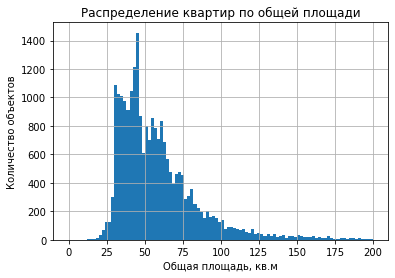

In [24]:
df['total_area'].plot(kind='hist', bins=100, range=(0, 200), grid=True)
plt.title('Распределение квартир по общей площади')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Количество объектов');

Из графика видно, что основная масса предложений в диапазоне от 30 до 65 кв.м. Видно несколько пиковых значений и провалы. Больше всего предложений в районе 45 кв.м. Стандартное отклонение 35,7 что довольно много, но выбросы не сильно повлияли на среднее значение. Квартир площадью больше 200 кв.м. довольно мало. 

**Изучим данные о стоимости квартир.**

In [25]:
df['last_price'].describe()

count        23,565.00
mean      6,540,058.26
std      10,910,934.72
min          12,190.00
25%       3,400,000.00
50%       4,646,000.00
75%       6,790,000.00
max     763,000,000.00
Name: last_price, dtype: float64

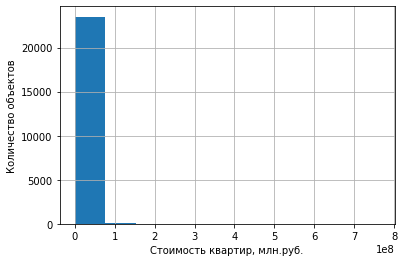

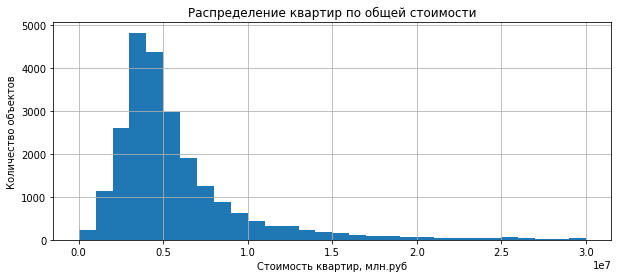

In [26]:
df['last_price'].hist()
plt.xlabel('Стоимость квартир, млн.руб.')
plt.ylabel('Количество объектов')
plt.show()
df['last_price'].hist(bins=30, range=(0, 3.0e7), figsize=(10, 4))
plt.title('Распределение квартир по общей стоимости')
plt.xlabel('Стоимость квартир, млн.руб')
plt.ylabel('Количество объектов')
plt.show()


Распределение похоже на нормальное, с положительной ассиметрией и длинным хвостом высоких значений. Из-за этого среднее значение больше медианы. На графике выведен диапазон от 0 до 30 млн. рублей. Пик цен приходится на 4 млн.руб.  Подозрительно выглядят квартиры с минимальной и максимальной ценой.  Вероятно в дальнейшем для более правдоподобной выборки нужно будет исключить такие значения.

**Изучим данные о высоте потолков.**

In [27]:
df['ceiling_height'].describe()

count   23,565.00
mean         2.72
std          0.99
min          1.00
25%          2.60
50%          2.65
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64

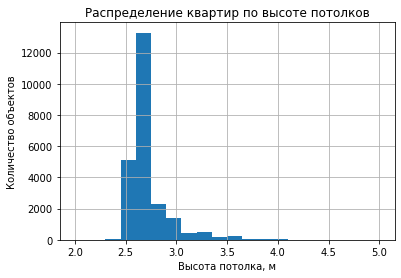

In [28]:
df['ceiling_height'].hist(bins=20, range=(2, 5))
plt.title('Распределение квартир по высоте потолков')
plt.xlabel('Высота потолка, м')
plt.ylabel('Количество объектов');

Средняя высота потолков 2.65 метров, что практически совпадает с медианой 2.7 метров и такая высота встречается чаще всего. Пик приходится на 2.7 метра. Разброс значений здесь не большой, однако встречаются редкие отклонения. Стандартное отклонение 0.9, вероятно будет стремиться к нулю, если убрать несколько выбивающихся значений.

**Изучим данные о количестве комнат.**

In [29]:
df['rooms'].describe()

count   23,565.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

1     8004
2     7897
3     5779
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64


135

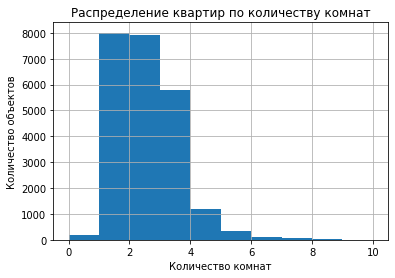

In [30]:
df['rooms'].hist(range=(0, 10))
plt.title('Распределение квартир по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объектов');

print(df['rooms'].value_counts())

len(df.query('rooms == 0 and studio == True'))

Больше всего квартир с 1, 2 и 3 комнатами. Медиана и среднее совпадают. Разброс значений не значительный. Квартиры с 5 и более комнатами встречаются редко. Квартиры с 0 комнат в большинстве наблюдений отмечены как студии, поэтому это значение вполне допустимо.

**Вывод**

Мы рассмотрели необходимые параметры объектов недвижимости, определили средние значения и общую структуру данных, обнаружили наличие слишком высоких и низких значений, которые будем обрабатывать в дальнейшем.

### Исследование времени продажи квартир

In [31]:
df['days_exposition'].describe()

count   20,394.00
mean       180.74
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64

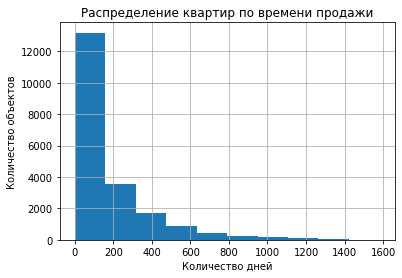

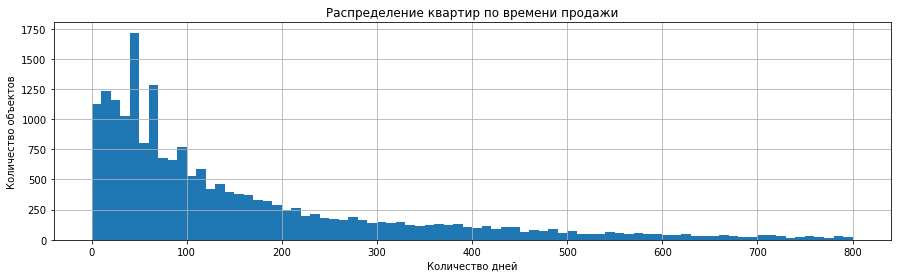

In [32]:
df['days_exposition'].hist()
plt.title('Распределение квартир по времени продажи')
plt.xlabel('Количество дней')
plt.ylabel('Количество объектов')
plt.show()
df['days_exposition'].hist(bins=80, range=(0, 800), figsize=(15, 4))
plt.title('Распределение квартир по времени продажи')
plt.xlabel('Количество дней')
plt.ylabel('Количество объектов')
plt.show()

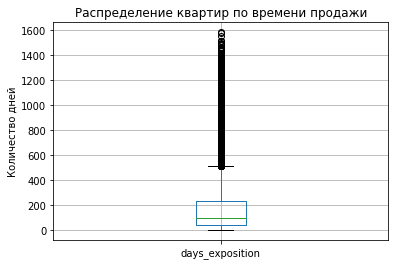

In [33]:
df[['days_exposition']].boxplot()
plt.title('Распределение квартир по времени продажи')
plt.ylabel('Количество дней');

Найдем как часто встречаются максимальные значения времени продажи и сколько всего значений лежит за границей нормального размаха.

In [34]:
df['days_exposition'].value_counts().head(10)

45.00    879
60.00    538
7.00     234
30.00    208
90.00    200
4.00     174
3.00     157
5.00     152
14.00    147
9.00     142
Name: days_exposition, dtype: int64

In [35]:
df.query('days_exposition > 500')['days_exposition'].count()

1737

Медиана в 180 дней в 1.9 раз больше среднего значения в 95 дней. Судя по гистограмме, распределение плавное, но видно два пика в районе 45, 60 дней. Чаще всего квартиры продаются за 45 дней. На диаграмме размаха нормальные значения оказались в пределах от 1 до 500 дней. Большая часть значений (межквартильный размах) в диапазоне от 50 до 230 дней. Значений за границей нормального размаха (больше 500 дней) - 1737, что составляет 7.4% от общего. Каждое значение встречается редко или однократно.

**Вывод** 

Можно сказать, что долгие продажи, это те, что лежат за границей межквартильного размаха, в данном случае дольше 250 дней. Есть и необычно долгие продажи свыше 500 дней. Быстрыми продажами можно считать те, что совершились менее чем за 50 дней и таких продаж очень много.

### Анализ редких и выбивающихся значений 

Для лучшего определения выбивающихся значений построим графики распределения для параметров площади, цены и высоты потолков.

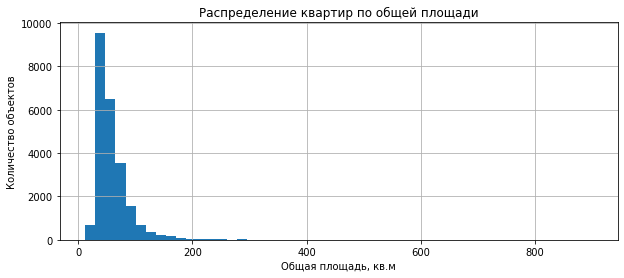

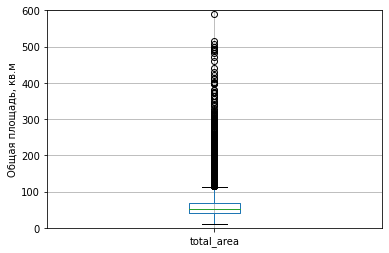

In [36]:
df['total_area'].hist(bins=50, grid=True, figsize=(10, 4))
plt.title('Распределение квартир по общей площади')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Количество объектов')
plt.show()

plt.ylim(0, 600)
df[['total_area']].boxplot()
plt.ylabel('Общая площадь, кв.м')
plt.show()

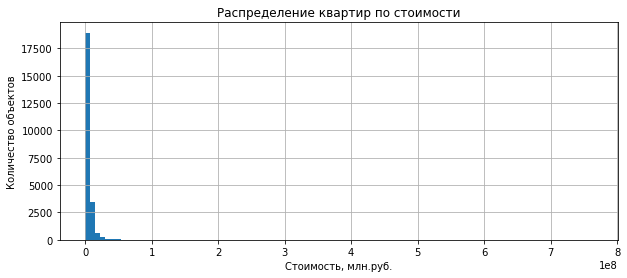

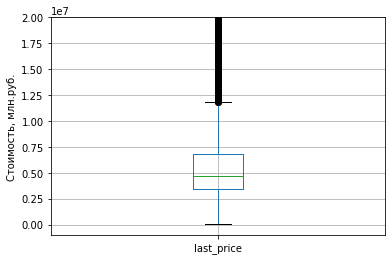

In [37]:
df['last_price'].hist(bins=100, grid=True, figsize=(10, 4))
plt.title('Распределение квартир по стоимости')
plt.xlabel('Стоимость, млн.руб.')
plt.ylabel('Количество объектов')
plt.show()

plt.ylim(-1000000, 20000000)
df[['last_price']].boxplot()
plt.ylabel('Стоимость, млн.руб.')
plt.show()

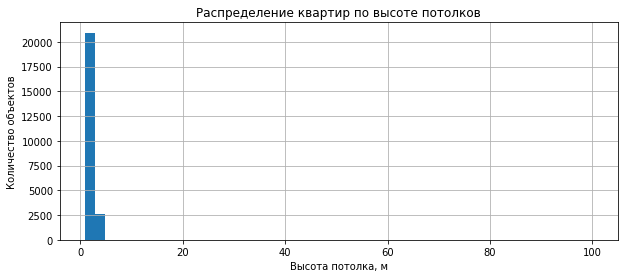

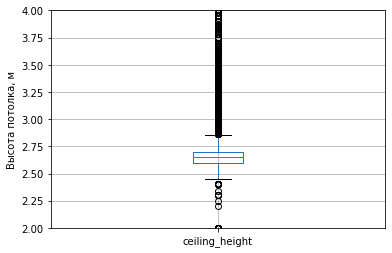

In [38]:
df['ceiling_height'].hist(bins=50, grid=True, figsize=(10, 4))
plt.title('Распределение квартир по высоте потолков')
plt.xlabel('Высота потолка, м')
plt.ylabel('Количество объектов')
plt.show()

plt.ylim(2, 4)
df[['ceiling_height']].boxplot()
plt.ylabel('Высота потолка, м')
plt.show()

Очистим данные от слишком высоких и низких значений. 

Для времени размещения отбросим значения дольше 500 дней. Долгая продажа может свидетельствовать о неадекватной цене или проблемах с документами у продавца.

Цены могут сильно зависеть от места и харакеристик дома, поэтому отбрасывать значения без причины мы не будем, но избавимся от минимального и максимального значений, которые выбиваются сильнее всего.

Высоту потолков предлагаем ограничить в диапазоне от 2.30 метров до 5. Высота ниже 2 метров встречается в нескольких наблюдениях, но это нельзя назвать нормальным показателем. Высота свыше 5 метров может быть у исторических объектов. 

Площадь квартир имеет очень широкий диапазон, судя по графику распределения в выбросы попали квартиры площадью от 110 кв.м., однако это вполне допустимая площадь. Можно отбросить значения свыше 450 кв.м., чтобы включить элитную недвижимость, но исключить редкие значения. 

Количество комнат ограничим 9, остальные знаения встречабтся в единичных случаях и не показательны.

In [39]:
clean_df = df.query('days_exposition <= 500 and 12190 < last_price < 763000000 and 2.3 <= ceiling_height < 5 and total_area <= 450 and rooms <= 9')
clean_df.shape

(18599, 29)

**Вывод**

Мы отбросили редкие и выбивающиеся значения там, где посчитали необходимым, поскольку это могло искажать результаты исследования. В очищенной таблице осталось 18599 строк. Отброшен 21% данных, не удовлетворяющих условиям.

### Исследование факторов, влияющих на стоимость квартиры

Изучим, зависит ли цена от площади, числа комнат и удалённости от центра. 
Посчитаем коэффициент корреляции для этих величин.

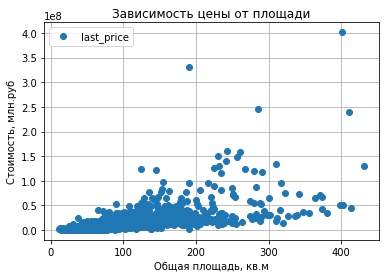

Коэффициент корреляции: 0.6604611102718598


In [40]:
clean_df.plot(x='total_area', y='last_price', style='o', grid=True)
plt.title('Зависимость цены от площади')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Стоимость, млн.руб')
plt.show()
print('Коэффициент корреляции:', clean_df['last_price'].corr(clean_df['total_area']))         

Зависимость цены от метража можно оценить как среднюю. Видно несколько аномально высоких значений. До 130 метров зависимость прослеживается более четко, далее становится слабее. 

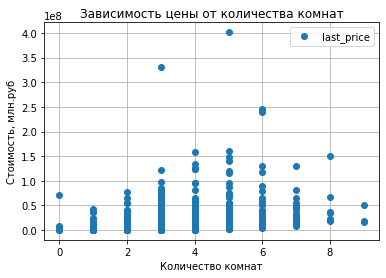

Коэффициент корреляции: 0.3772787924591549


In [41]:
clean_df.plot(x='rooms', y='last_price', style='o', grid=True)
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость, млн.руб')
plt.show()
print('Коэффициент корреляции:', clean_df['last_price'].corr(clean_df['rooms']))   

Зависимость цены от количества комнат слабая, только некоторая часть многокомнатных объектов стоят дороже остальных. Дорогих объектов с 6 и более комнатами довольно мало, стоимость на такие объекты сопоставима с 1-3 комнатными квартирами, вероятно на ценообразование тут оказывают влияние другие факторы.

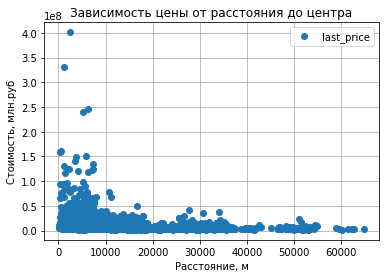

Коэффициент корреляции: -0.22689912196518816


In [42]:
clean_df.plot(x='city_centers_nearest', y='last_price', style='o', grid=True)
plt.title('Зависимость цены от расстояния до центра')
plt.xlabel('Расстояние, м')
plt.ylabel('Стоимость, млн.руб')
plt.show()

print('Коэффициент корреляции:', clean_df['last_price'].corr(clean_df['city_centers_nearest']))   

Корреляция слабая, однако на графике видно, что самые дорогие объекты находятся в пределах 10 км от центра. За этой границей стоимость постепенно снижается, однако есть локальные всплески, вероятно на этом расстоянии расположены хорошие районы, либо крупные города в пригороде.


Изучим зависимость стоимости от этажа квартиры (первый, последний, другой).

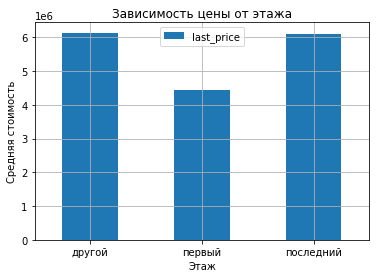

In [43]:
clean_df.pivot_table(index='floor_level', values='last_price').plot(kind='bar', grid=True)
plt.title('Зависимость цены от этажа')
plt.xlabel('Этаж')
plt.ylabel('Средняя стоимость')
plt.xticks(rotation=0);

Можно сказать, что первый этаж в среднем гораздо дешевле, чем остальные. Средняя стоимость последнего и других этажей практически одинакова. 

Изучим зависимость стоимости квартиры от даты размещения: дня недели, месяца и года.  Построим матрицу корреляции для наглядности.

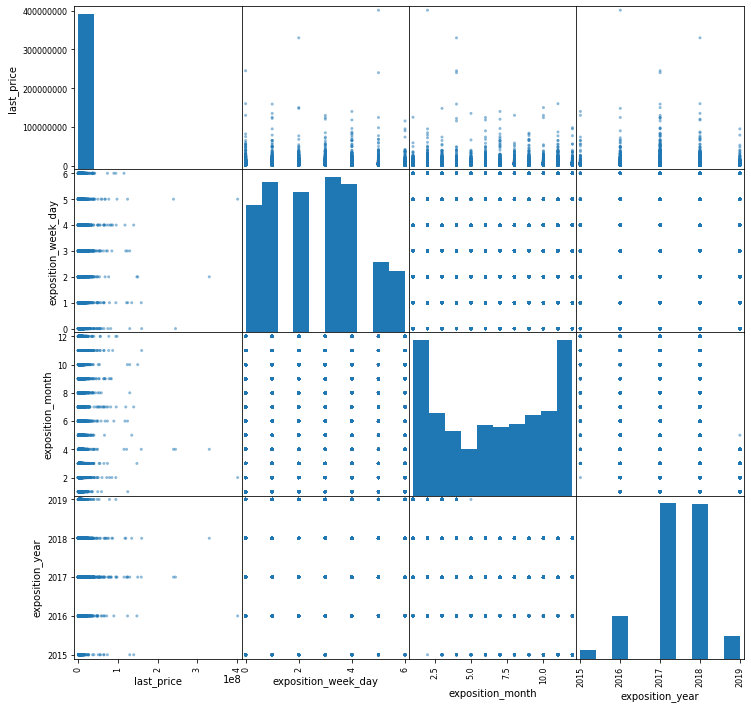

In [44]:
df_part = clean_df[['last_price', 'exposition_week_day', 'exposition_month', 'exposition_year']]
pd.plotting.scatter_matrix(df_part, figsize=(12, 12))
plt.show()

Можно сказать, что зависимости стоимости от даты не наблюдается. В разные года можно видеть больше или меньше значений, но это скорее показывает неоднородноть данных. Данных за один период больше, чем за другой.

**Вывод**

Можно сказать, что больше всего на цену влияет удаленность от центра и номер этажа. Квартиры на первом этаже востребованы меньше всего. Самая высокая стоимость квартир по удаленности от центра - до 10 км. Остальные параметры оказывают меньшее воздействие на цену или не влияют вовсе. 

### Исследование 10 населённых пунктов с наибольшим числом объявлений

Посчитаем среднюю цену квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

Воспользуемся сводной таблицей. Отсортируем наблюдения по названию населенного пункта, применим функции подсчета количества и среднего, заменим мультииндексы и отсортируем таблицу по убыванию количества объявлений.

                   amount       mean
locality_name                       
Санкт-Петербург     12328 111,333.34
посёлок Мурино        481  85,958.24
посёлок Шушары        384  77,792.49
Всеволожск            308  68,605.62
Колпино               293  74,779.51
посёлок Парголово     287  89,186.22
Пушкин                278 101,894.61
деревня Кудрово       266  92,656.98
Гатчина               243  68,076.90
Выборг                191  57,117.83


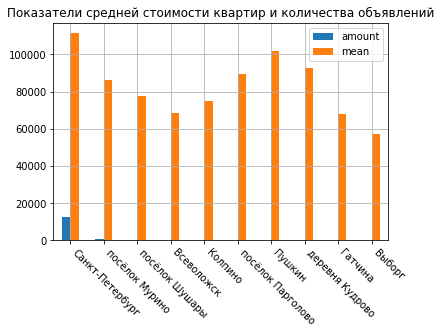

In [45]:
df_part = clean_df.pivot_table(index='locality_name', values='m2_price', aggfunc=['count', 'mean'])
df_part.columns = ['amount', 'mean']
sample = df_part.sort_values('amount', ascending=False).head(10)
print(sample)
sample.plot(kind='bar', grid=True, legend=True)
plt.title('Показатели средней стоимости квартир и количества объявлений')
plt.xlabel(None)
plt.xticks(rotation=-45, ha='left');
plt.show()

Получен список 10 населенных пунктов, где видно количество объявлений для каждого и среднюю цену за кв.м. Больше всего объявлений в Санкт-Петербурге. На графике видно, что из этих 10 населенных пунктов самая высокая стоимость жилья за кв.м. в Санкт-Петербурге, а самая низкая в Выборге.

### Анализ изменения цены по степени удаленности от центра

Выделим квартиры в Санкт-Петербурге в отдельную таблицу.

In [46]:
spb = clean_df.query('locality_name == "Санкт-Петербург" and city_centers_nearest != "NaN"')
spb['km_to_center'] = (spb['city_centers_nearest'] / 1000).round()
spb[['locality_name', 'city_centers_nearest', 'km_to_center']].head()

,locality_name,city_centers_nearest,km_to_center
3,Санкт-Петербург,"6,800.00",7.00
4,Санкт-Петербург,"8,098.00",8.00
9,Санкт-Петербург,"15,008.00",15.00
10,Санкт-Петербург,"13,878.00",14.00
15,Санкт-Петербург,"14,259.00",14.00


Посчитаем среднюю цену квартиры для каждого километра и количество объявлений на каждый километр для большего понимания ситуации.

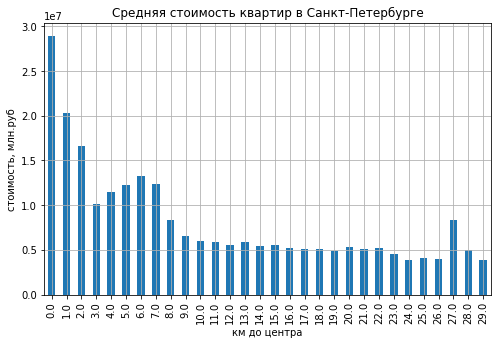

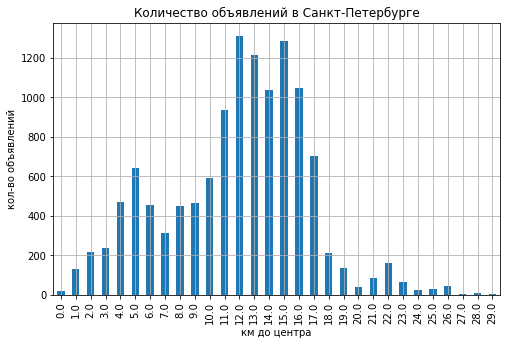

In [47]:
spb.groupby('km_to_center')['last_price'].mean().plot(kind='bar', grid=True, figsize=(8, 5))
plt.title('Средняя стоимость квартир в Санкт-Петербурге')
plt.xlabel('км до центра')
plt.ylabel('стоимость, млн.руб')
plt.show()

spb.groupby('km_to_center')['last_price'].count().plot(kind='bar', grid=True, figsize=(8, 5))
plt.title('Количество объявлений в Санкт-Петербурге')
plt.xlabel('км до центра')
plt.ylabel('кол-во объявлений')
plt.show()

Максимальные значения цены видим в районе от 0 до 2 км. Затем идет спад и плавное повышение цены до 7 км., далее показатели резко ниже. Судя по графику, будем считать, что центром города является область до 7 км. от центра. В области до 3 км слишком мало объявлений.  




### Сравнение выводов по квартирам в центре с общими выводами по городу

Выделим квартиры в центре в отдельную таблицу и изучим параметры: площадь, цена, число комнат, высота потолков.

In [48]:
spb_center = spb.query('km_to_center <= 7')
spb_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2_price,exposition_week_day,exposition_month,exposition_year,floor_level,kitchen_ratio,living_ratio,km_to_center
3,0,64900000,159.00,2015-07-24,3,2.65,14,47.37,9,False,False,False,11.29,0,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,"408,176.10",4,7,2015,другой,0.07,0.30,7.00
24,8,6500000,97.20,2015-10-31,2,2.65,3,46.50,1,False,False,False,19.60,0,Санкт-Петербург,"20,052.00","2,336.00",3.00,411.00,3.00,124.00,265.00,"66,872.43",5,10,2015,первый,0.20,0.48,2.00
63,2,20000000,118.00,2018-09-11,3,3.00,9,68.00,7,False,False,False,16.00,0,Санкт-Петербург,"26,055.00","4,800.00",1.00,648.00,1.00,779.00,37.00,"169,491.53",1,9,2018,другой,0.14,0.58,5.00
94,3,3500000,29.50,2019-04-26,1,2.50,5,15.60,2,False,False,False,5.50,1,Санкт-Петербург,"12,921.00","7,303.00",0.00,NaN,0.00,NaN,4.00,"118,644.07",4,4,2019,другой,0.19,0.53,7.00
99,32,9600000,90.00,2017-09-26,4,2.65,5,67.00,2,False,False,False,8.00,0,Санкт-Петербург,"23,277.00","2,818.00",0.00,NaN,0.00,NaN,104.00,"106,666.67",1,9,2017,другой,0.09,0.74,3.00


In [49]:
pd.concat([spb_center['total_area'].describe(), 
           spb_center['last_price'].describe().astype('int'), 
           spb_center['rooms'].describe(), 
           spb_center['ceiling_height'].describe() ], 
          axis=1)

,total_area,last_price,rooms,ceiling_height
count,"2,472.00",2472,"2,472.00","2,472.00"
mean,85.88,13013702,2.69,2.90
std,49.33,18692871,1.30,0.34
min,12.00,1600000,0.00,2.40
25%,53.50,6290000,2.00,2.65
50%,74.20,8500000,3.00,2.75
75%,100.60,12877500,3.00,3.10
max,413.50,401300000,9.00,4.90


Имеем 2472 квартиры в пределах ценральной зоны. 

Выделим факторы, которые влияют на стоимость квартиры. Для начала рассмотрим этажность. Оперделим среднюю стоимость квартир на первом, последнем и других этажах.

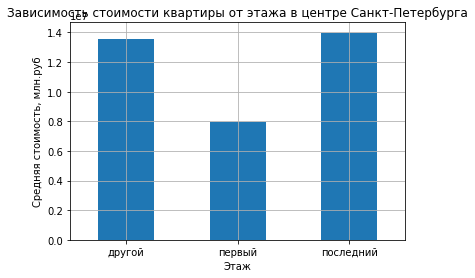

In [50]:
spb_center.groupby('floor_level')['last_price'].mean().plot(kind='bar', grid=True)
plt.title('Зависимость стоимости квартиры от этажа в центре Санкт-Петербурга')
plt.xlabel('Этаж')
plt.ylabel('Средняя стоимость, млн.руб')
plt.xticks(rotation=0);

Сравним среднюю стоимость квартир на разных этажах в центре и по всем районам.

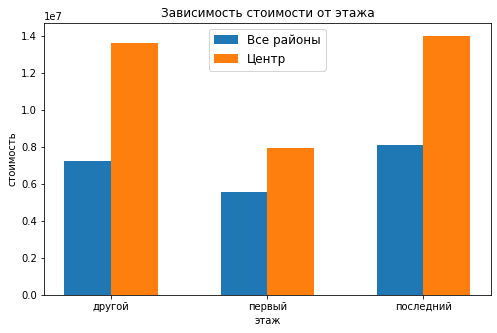

In [51]:
fig, ax = plt.subplots(figsize=(8,5))

city = spb.groupby('floor_level')['last_price'].mean().reset_index()
center = spb_center.groupby('floor_level')['last_price'].mean().reset_index()
plt.bar(city['floor_level'], city['last_price'], width = -0.3, label="Все районы", align = 'edge')
plt.bar(center['floor_level'], center['last_price'], width = 0.3, label="Центр", align = 'edge')
plt.title("Зависимость стоимости от этажа")
plt.xlabel("этаж")
plt.ylabel("стоимость")
plt.legend(fontsize = 12)
plt.show()

Видно, что тенденция сохраняется, и в центре и в целом по городу квартиры на первом этаже дешевле. 

Теперь посчитаем коэффициент корреляции и построим графики для остальных параметров объектов недвижимости в центре: общая площадь, число комнат, удалённость от центра, день недели, месяц, год размещения объявления.

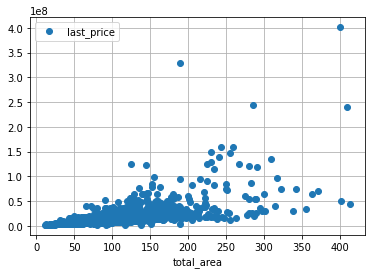

Коэффициент корреляции total_area: 0.6284783858939331


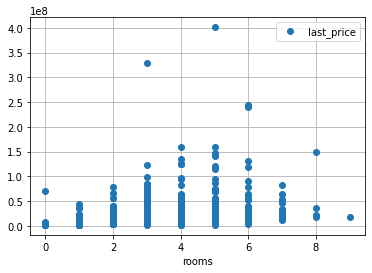

Коэффициент корреляции rooms: 0.3411493645122976


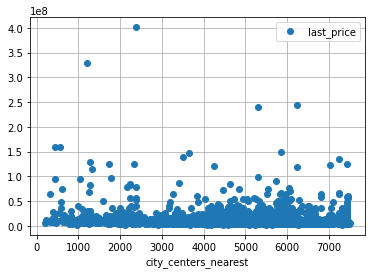

Коэффициент корреляции city_centers_nearest: -0.067302768370364


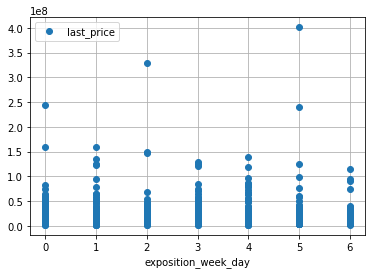

Коэффициент корреляции exposition_week_day: 0.020176198329156368


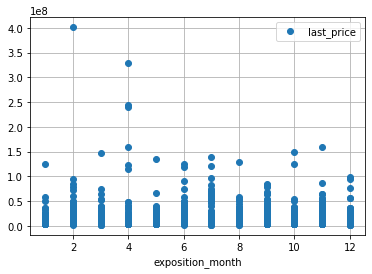

Коэффициент корреляции exposition_month: -0.028886095865900997


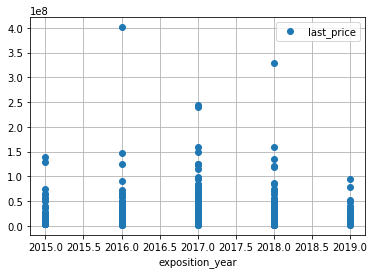

Коэффициент корреляции exposition_year: -0.05936027072376194


In [52]:
col = ['total_area', 'rooms', 'city_centers_nearest', 'exposition_week_day', 'exposition_month', 'exposition_year']

for parameter in col:
    spb_center.plot(x=parameter, y='last_price', style='o', grid=True)
    plt.show()
    print(f'Коэффициент корреляции {parameter}:', spb_center['last_price'].corr(spb_center[parameter]))

По данным можно сказать, что в центральной зоне дата размещения объявления никак не влияет на стоимость жилья. Уданенность от центра в центральной части также практически не коррелируется с ценой. Количество комнат оказывает влияние на цену, есть слабая корреляция. Виден рост максимальных значений до 5 комнат, далее идет спад. Корреляцию с общей площадью можно оценить как среднюю, объекты большой площади с низкой ценой встречаются 

Теперь сравним распределение средней стоимости квартир в центре и по всем районам в зависимости от количества комнат и общей площади.

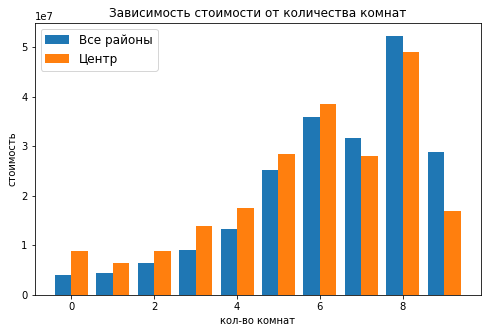

In [53]:
fig, ax = plt.subplots(figsize=(8,5))

city = spb.groupby('rooms')['last_price'].mean().reset_index()
center = spb_center.groupby('rooms')['last_price'].mean().reset_index()
plt.bar(city['rooms'], city['last_price'], width = -0.4, label="Все районы", align = 'edge')
plt.bar(center['rooms'], center['last_price'], width = 0.4, label="Центр", align = 'edge')
plt.title("Зависимость стоимости от количества комнат")
plt.xlabel("кол-во комнат")
plt.ylabel("стоимость")
plt.legend(fontsize=12)
plt.show()

Видим, что в центре города стоимость студий в среднем выше, чем стоимость однокомнатных квартир. Стоимость закономерно плавно повышается с увеличением кол-ва комнат как по городу в целом, так и в центре. Квартиры с 6 и более комнатами встречаются редко, низкая стоимость этих помещений может быть связана с рядом других факторов.

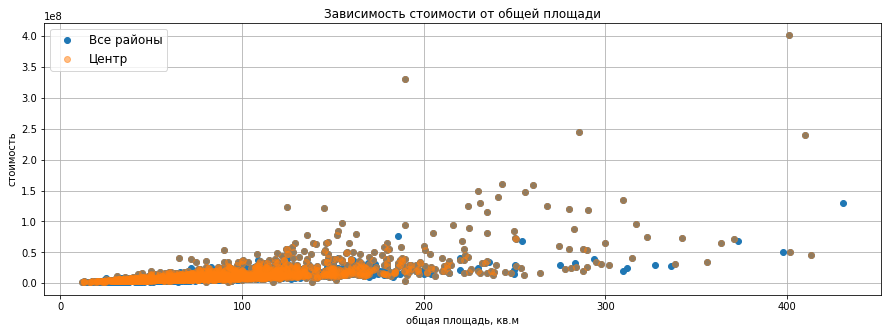

In [54]:
fig, ax = plt.subplots(figsize=(15,5))

spb.plot(x='total_area', y='last_price', style='o', grid=True, ax=ax, label="Все районы")
spb_center.plot(x='total_area', y='last_price', style='o', alpha=0.5, grid=True, ax=ax, label="Центр")
plt.title("Зависимость стоимости от общей площади")
plt.xlabel("общая площадь, кв.м")
plt.ylabel("стоимость")
plt.legend(fontsize=12)
plt.show()

**Вывод**

В центральной зоне уданенность от центра практически не коррелируется с ценой, в отличие от данных по городу, где видно повышение средних цен в центральной части.
Количество комнат также слабо влияет на цену. Виден рост максимальных значений до 5 комнат, далее идет спад.
Дата размещения никак не влияет на стоимость жилья в центре. Такая ж картина в целом по городу.
Размер общей площади квартры средне коррелируется со стоимостью, как в центре, так и по городу. Можно увидеть объекты с большой площадью и низкой ценой. 

## Общий вывод

В ходе исследования мы изучили файл с данными, провели предварительную обработку значений, в результате которой избавились от части пропусков и неинформативных строк. Мы посчитали и добавили в таблицу необходимые по заданию значения. Далее мы исследовали параметры объектов и сделали выводы относительно зависимостей различных факторов на стоимость. 

В нашем датасете были квартиры с очень разными параметрами площади, этажности, высотой потолков, удаленности от центра и количества комнат. Это позволило сделать общие выводы о широком круге объектов, как бюджетных, так и элитных. При этом мы определили допустимые границы значений и отсекли часть выбивающихся аномальных значений, которые выглядели неправдоподобно или могли исказить выводы.

Основными факторами, влияющими на стоимоссть квартиры по нашим данным можно считать удаленность от центра и этаж. При этом этаж сохраняет свою значимость и для квартир в центральной части Санкт-Петербурга, тогда как расстояние до центра в этой части города перестает прямо влиять на цену. Мы увидели, что площадь квартир не всегда прямо влияет на стоимость. Можно предположить, что другие параметры, например, расположение, общее состояние, этаж значительно влияют на оценку, следовательно для определения стоимости необходимо учитывать совокупность параметров.
